Heart Disease Prediction 

In this project we will try to estimate the heart disease prediciton using the data and Our data contains a lot of health parameters on the basis of which we will predict that whether a person will get heart disease or not .

Before importing our data we will import all the libraries that we are going to need to make our data meaningful for our model to learn and to apply Machine Learning algorithm.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# Source of data is Kaggle Datasets
data=pd.read_csv(r"C:\Users\91967\Desktop\downloads\heart_disease.csv")

In [5]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [6]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
#as we are able to see clearly that our data contain only 1 column witj string values 
# Also now we will check for  null values in our data 
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
# so there are no null  or missing values in our data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [10]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [12]:
#Now we have only one column left which have object type of data in our dataset
# so first of all we will transform this 
#also we can reach further without transforming this into integer form and can perform visualization before that 
#        NOTE--- we can also use LableEncoder to tranform this 
data["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

So there are only 2 object type data we have . So first of all we will perform the Visualization task

VISUALIZATION 

Here 1 in sex column represents gender " Male" and 0 represents gender "Female".


<AxesSubplot:xlabel='Sex', ylabel='count'>

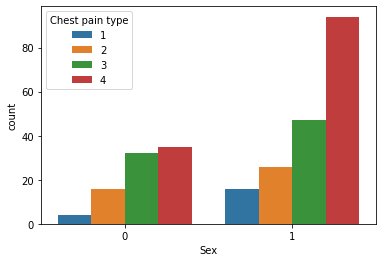

In [17]:
sb.countplot(x=data['Sex'],hue='Chest pain type',data=data)

From the above graph we came on analysis that Male are more prone to chest pain type 4 which is very dangerous.


<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

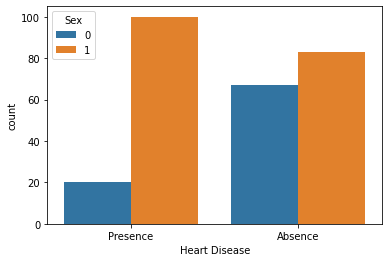

In [15]:
sb.countplot(x=data['Heart Disease'],hue='Sex',data=data)
#from this graph we will try to understand of what gender of people have heart disease or not 

So from the above graph we will came to know that Male are more effected.

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

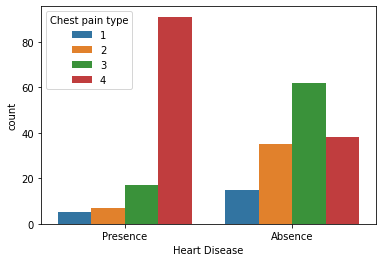

In [18]:
sb.countplot(x=data['Heart Disease'],hue='Chest pain type',data=data)

From here we can conclude that people who suffer from chest pain type 4 has more chances of getting heart disease.

<AxesSubplot:xlabel='Heart Disease', ylabel='BP'>

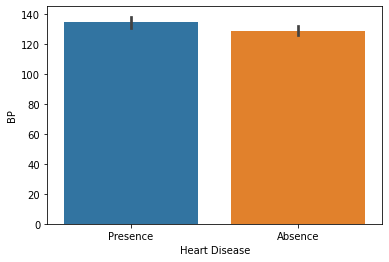

In [20]:
sb.barplot(x=data['Heart Disease'],y=data['BP'],data=data)

From above we can say that those who have high BP have more chances of getting a heart disease.

<AxesSubplot:xlabel='Heart Disease', ylabel='Cholesterol'>

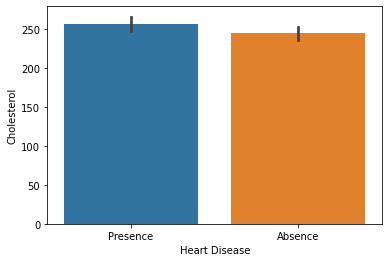

In [21]:
sb.barplot(x=data['Heart Disease'],y=data['Cholesterol'],data=data)

Similarly here shown that who have high Cholestrol level are more prone to heart disease. 

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

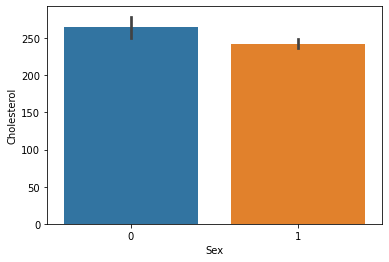

In [23]:
sb.barplot(x=data['Sex'],y=data['Cholesterol'],data=data)

Here the graph shows that Female have high Cholestrol level as compare to Males. 

Now we will plot some lineplot of Age column and will try to understand what effect we have on other columns or what is the relation between the age and those columns.

<AxesSubplot:xlabel='Age', ylabel='BP'>

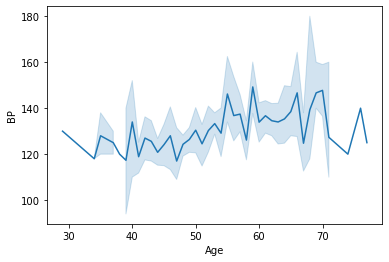

In [25]:
sb.lineplot(x=data['Age'],y=data['BP'],data=data)

Here we will see that BP increase mainly in the age of 50 to 65 and decreases severly after the age of 70.

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

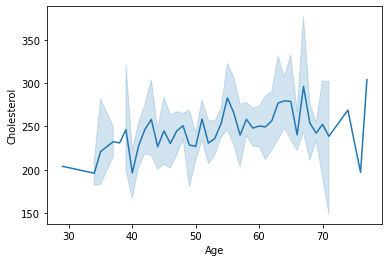

In [27]:
sb.lineplot(x=data['Age'],y=data['Cholesterol'],data=data)

Here we will see that Cholestrol increases mainly in the age of 60 to 70 means that persons belonging to this age have the more chances of getting a heart disease because cholestrol is also a major cause of heart disease. 

<AxesSubplot:xlabel='Age', ylabel='ST depression'>

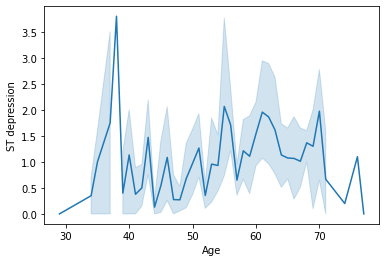

In [28]:
sb.lineplot(x=data['Age'],y=data['ST depression'],data=data)

Here similarly it shows that persons of age 30 to 40 have the higest ST Depression . Whatever maybe the reason but the graph show us the clear indication of ST Depression with the age.


Now we will plot some lineplot of Sex column and will try to understand what effect we have on other columns or what is the relation between the Sex and those columns.

<AxesSubplot:xlabel='Sex', ylabel='FBS over 120'>

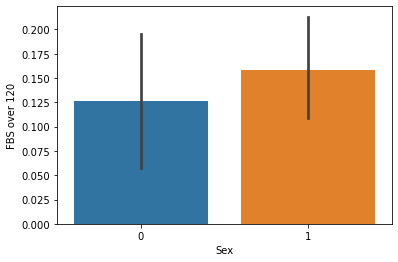

In [29]:
sb.barplot(x=data['Sex'],y=data['FBS over 120'],data=data)

Similarly we will see that Male have high number of FBS over 120

<AxesSubplot:xlabel='Sex', ylabel='ST depression'>

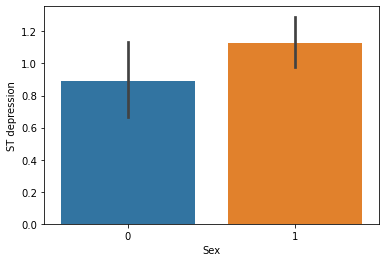

In [30]:
sb.barplot(x=data['Sex'],y=data['ST depression'],data=data)

Here also shown that Males have high number of ST Depression.

<AxesSubplot:xlabel='Sex', ylabel='Exercise angina'>

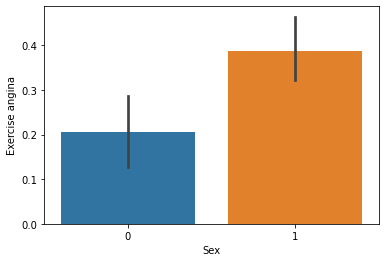

In [32]:
sb.barplot(x=data['Sex'],y=data['Exercise angina'],data=data)

<AxesSubplot:>

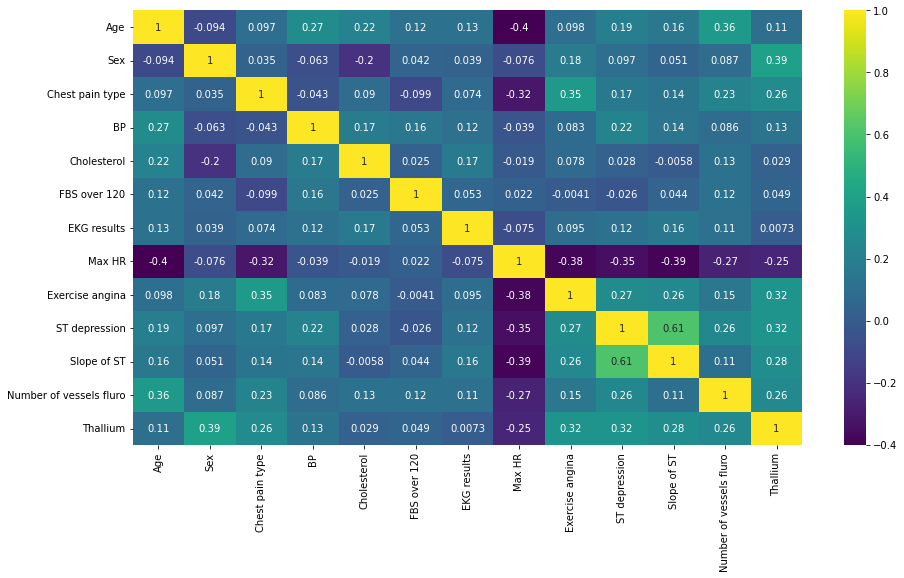

In [43]:
plt.figure(figsize=(15,8))
sb.heatmap(data.corr(),linecolor="white",annot = True, cmap = 'viridis')

Now we will perform Model Training

MODEL TRAINING

Now before performing the Model Selection and we have to convert that "Heart Disease" column into integer type and we will convert that into integer by :  

In [44]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [45]:
data["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

As we are able to see that the column has only 2 values so we will replace them by 0 and 1 
We can also do that by lable encoder


In [46]:
data.replace({"Absence":0,"Presence":1})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


Now we will perform Model Selection 

In [48]:
y=data['Heart Disease']
x=data.drop(['Heart Disease'],axis=1)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [51]:
score_1

0.7777777777777778

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [53]:
score_2

0.8148148148148148

In [54]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

In [55]:
max(list_1)

0.7037037037037037

From all of the above MODEL SELECTIONS we are able to see that RandomForestClassifier have the most accuracy score  . However  LogisticRegression also gives us a good score and cannot be neglected whereas KNeighborsClassifier doesn't have so much good score.

From the above Model Deployment we will go with the logistic regression as the answers from our model deployment will give us a boolean classification and we all know that Logistic Regression always hold good in case of boolean Classification.

So from the Above 3 Models we we will select Logistic Regression which gives us  a good score.